Ryan Grosso. 
Example 1 from ML Coursera

# Linear regression with one variable

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.

Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns#seaborn will make nice plots! 
#matplotlib.style.use('seaborn-dark-palette')
#sns.set_style("white", {"axes.grid": True})
#sns.set_style("darkgrid", {"axes.grid": True})



In [2]:
#Use pandas 
import pandas as pd
data_file_2 = 'data/ex2data1.txt'
df = pd.read_csv(data_file_2,delimiter=',',header=None)
df.columns=['exam1','exam2','admit']

## Visualize the data


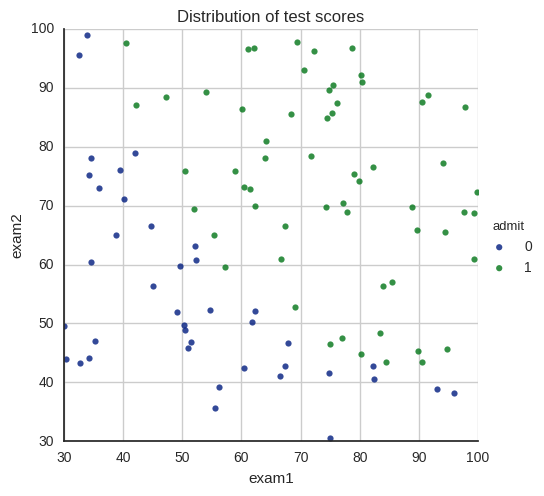

In [3]:
def plot_rawdata(leg=False):
    import seaborn as sns#seaborn will make nice plots! 
    matplotlib.style.use('seaborn-dark-palette')
    sns.set_style("white", {"axes.grid": True})
    g =sns.lmplot(x="exam1", y="exam2", hue="admit",data=df,fit_reg=None,legend=leg)
    plt.xlim(30,100)
    plt.ylim(30,100)
    plt.title("Distribution of test scores")
plot_rawdata(True)
plt.show()

### Implementation 

I hope this is true 0.5 = 0.5


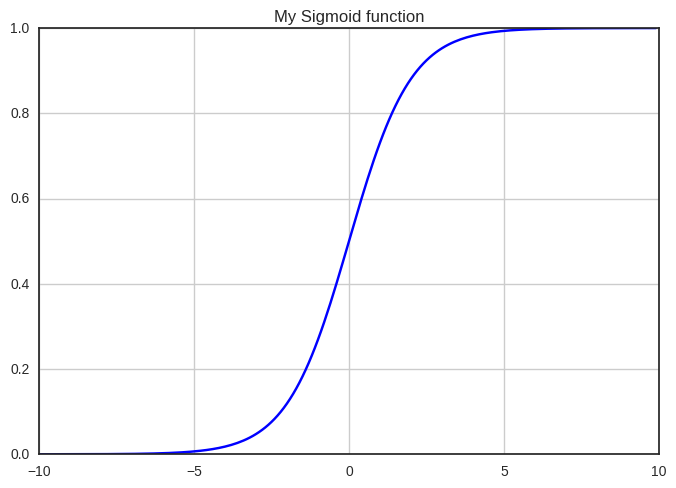

In [4]:
#First we need a sigmoid function, There are a few around like in scipy
#But we will define our own so we see what's happening
def my_sigmoid(x):
    return 1./(1+np.exp(-1.*x))
#Quick check. x = 0 should return 0.5
print'I hope this is true 0.5 =', str(my_sigmoid(0))

def show_my_sig():
    x = np.arange(-10,10,0.1)
    y = my_sigmoid(x)
    plt.plot(x,y,"b-")
    plt.title("My Sigmoid function")
    plt.grid(True)
    plt.show()
    
show_my_sig()

In [5]:
# now implement a function to handle the cost and hypothesis 

# Definition for hypothesis 
def h(theta,x):
    return my_sigmoid(np.dot(x,theta))
# Definition of function for cost
def cost_logistic(Theta_values,X,y,m):
    # cost is 1/(m) sum( -y*log(h) - (1-y)*log(1-h))  
    first_term = np.dot( -np.transpose(y),np.log(h(Theta_values,X)))
    second_term = np.dot((1-np.transpose(y)),np.log(1-h(Theta_values,X)))
    j = (1./m)* np.sum(first_term-second_term)
    return float(j)


In [6]:
#Bring the data into nparrays from pandas 
preX = df[["exam1","exam2"]]
ones = pd.DataFrame({'x0' : pd.Series([1 for x in range(len(preX))])})
#here is my X
X = pd.concat([ones,preX],axis=1).as_matrix()
#here is my y
y = df[['admit']].as_matrix()
m= len(y)
print' Total events in the sample {}'.format(m)

 Total events in the sample 100


In [7]:
#initialze with zero 
Initial_theta = np.zeros((X.shape[1],1))
cost_logistic(Initial_theta,X,y,m) #should be .693

0.6931471805599453

In [8]:
# in the coursera class they use octave.... we can use scipy
from scipy import optimize

def OptimizeTheta(thetas, X, y):
    myret = optimize.fmin(cost_logistic, x0=thetas, args=(X, y,len(y)), maxiter=500, full_output=True)
    return myret[0], myret[1]
Thetas , cost_val = OptimizeTheta(Initial_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [9]:
#IF we use the optimal values of theta we should get something like .20 co
print cost_logistic(Thetas,X,y,len(y))

0.20349770159


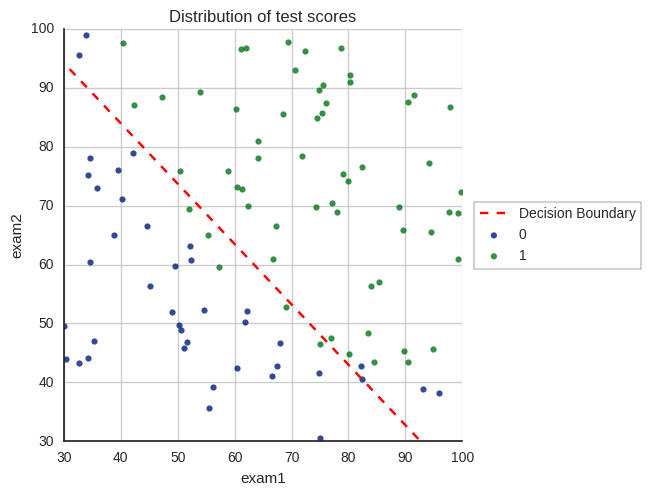

In [10]:
#now we look at the descision boundary
def plot_dec():
    #plot the pointsheta
    plot_rawdata()

    myx = np.arange(int(df["exam1"].min()-1),int(df["exam1"].max()+1))
    myy =  (-1./Thetas[2])*(Thetas[0] + Thetas[1]*myx)   
    plt.plot(myx,myy,"r--",label="Decision Boundary")
    plt.legend(bbox_to_anchor=(1.45, 0.5), loc=7, borderaxespad=0.,frameon=True)

                        
    
plot_dec() 
plt.show()

In [11]:
# If I pick a pair of exams ... what does the model return 
#pick 100,100 
testpt = np.array([[1,100,100]])# yes I know it's sloppy
# So my model return is  
np.dot(Thetas,testpt.T)

array([ 15.60898433])

In [12]:
#Bring the data into nparrays from pandas should have organize this ealier 
temp_df = df
ones = pd.DataFrame({'x0' : pd.Series([1 for x in range(len(temp_df))])})
#here is my X
X_df = pd.concat([ones,temp_df],axis=1)
#here is my y
prex_admit = X_df[X_df.admit==1]
x_admit = prex_admit[['x0','exam1','exam2']].as_matrix()
prex_rej = X_df[X_df.admit==0]
x_rej = prex_rej[['x0','exam1','exam2']].as_matrix()

In [13]:
#Now that we have made a model proceed to report the training accuracy of your classifier by computing the
#percentage of examples it got correct.
matrix_admit = df[df.admit==1].as_matrix()
matrix_rej = df[df.admit==0].as_matrix()
def makePrediction(mytheta, X):
    return h(mytheta,X) >= 0.5

#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(Thetas,x_admit)))
neg_correct = float(np.sum(np.invert(makePrediction(Thetas,x_rej))))
tot = len(matrix_admit)+len(matrix_rej)
prcnt_correct = float(pos_correct+neg_correct)/tot
print "Fraction of training samples correctly predicted: %f." % prcnt_correct

Fraction of training samples correctly predicted: 0.890000.


## Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.

Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [14]:
#Bring in the data 
df2 = pd.read_csv('data/ex2data2.txt',header=None)
df2.columns = ['chip1','chip2','pass']
#print df2.head()
 
#append on the x0 terms    
ones = pd.DataFrame({'x0' : pd.Series([1 for x in range(len(df2))])})
myMat = pd.concat([ones,df2],axis=1).as_matrix()
#here is my X
myX = myMat[:,:3]
#here is my y
myy = myMat[:,-1:]


### First Visualize the dataset 
We can show off a little bit with pandas... usually I have found that Pandas is good for showing technical people plots but is not as liberal as implementing plots directly with matplotlib. 



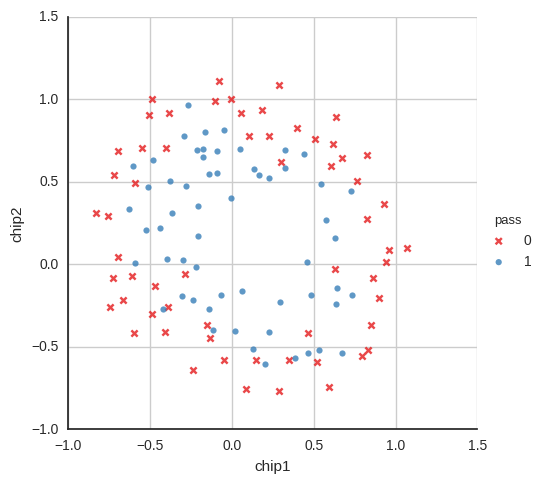

In [15]:
def viz_data():
    import seaborn as sns
    sns.lmplot(x='chip1',y='chip2',hue='pass',data=df2,markers=["x", "o"],palette="Set1",fit_reg=None)
    plt.show()
viz_data()

### Feature Mapping

In [16]:
# We need a function to build the matrix for feature mapping.
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [17]:
#Make my featured map... This will replace the design matrix X in our cost and minimization 
myfeatX = mapFeature(myX[:,1],myX[:,2])
#Now let's learn the params for theta
Initial_theta = np.zeros((myfeatX.shape[1],1))# Remeber we need to shape agains the featX
cost_logistic(Initial_theta,myfeatX,myy,len(myy)) # we should exptect to see .693

0.6931471805599454

In [18]:
#Run the minimization with regularization
# This is just adding a regularization term to the existing cost fucntion 
def cost_logistic_reg(Theta_values,X,y,m,reg_lambda = 0 ): # Lambda = 0 means no reg applied
    # cost is 1/(m) (  sum( -y*log(h) - (1-y)*log(1-h)) +lamb/2 theta*theta)
    first_term = np.dot( -np.transpose(y),np.log(h(Theta_values,X)))
    second_term = np.dot(np.transpose(1-y),np.log(1-h(Theta_values,X)))
    reg_term = (reg_lambda /2.) * np.sum(np.dot(np.transpose(Theta_values[1:]),Theta_values[1:]))
    j = (1./m)* (np.sum(first_term-second_term)+reg_term)
    return float(j)

# Now  Optimize 
# note, we play around with different techniques.  Feel free to uncomment and look at how perfomance varies 
# fmin      --> takes a lot of steps to converge, not a very low cost
# fmin_bfgs --> Converges pretty quick and gets a reasonable cost (use this for the example)
# fmin_cg   --> take a little while, lots of steps and is not that greatbut  reasonale cost either 
def OptimizeTheta_reg(mytheta,myX,myy,mylambda=0.):
    #myret = optimize.fmin(cost_logistic_reg, x0=thetas, args=(myX, myy,len(myy),mylambda), maxiter=20000, full_output=True)
    myret = optimize.fmin_bfgs(cost_logistic_reg, x0=mytheta, args=(myX, myy,len(myy),mylambda), maxiter=600, full_output=True, disp=False)
    #myret = optimize.fmin_cg(cost_logistic_reg, x0=thetas, args=(myX, myy,len(myy),mylambda), maxiter=20000, full_output=True)
    return np.array([myret[0]]), myret[1]
    
theta, mincost = OptimizeTheta_reg(Initial_theta, myfeatX, myy,10)
print theta.shape  # we should have 28 params
np.dot(theta,mapFeature(np.array([0]),np.array([0])).T)

(1, 28)


array([[ 0.32617626]])

### Visualize what we have

In [20]:
# let's use matplotlib so things look reasonable 

# Make two arrays for pass and fail 
x_pass = np.array( [myX[i] for i in range(len(myX)) if myy[i]==1])
x_fail = np.array( [myX[i] for i in range(len(myX)) if myy[i]==0])

def make_dataplot():
    # This is very useful if you need to make a pretty plot fast while working
    #print(plt.style.available)
    #pandas is nice if you want to see the labels for things and see whats going on
    #but you don't have as much control to make plots pretty 
    # I find that matplitlibe is much better... for pretty plots... 
    # ok... i'll stop ranting on how much I like using Seaborn to get things done quickly
    with plt.style.context(("seaborn-white")):
        plt.plot(x_pass[:,1],x_pass[:,2],"bo",label='Pass')
        plt.plot(x_fail[:,1],x_fail[:,2],"ro",label='Fail')
        plt.xlabel("Chip1")
        plt.ylabel("Chip2")
        plt.grid(True)
        plt.legend(frameon=True)

        
#For this we will use countour plot frompython.... There is an examle that I used in the first homework

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
plt.style.context(("seaborn-white"))


def plot_decision_boundary(myX, myy, Mylambda,ab='contour'): # mapped feature space , myy, any lambda
    #ab ==> {'both','surface' ,'contour'}
    #run optimization
    Initial_theta = np.zeros((myX.shape[1],1))
    theta, cost_val = OptimizeTheta_reg(Initial_theta,myX,myy,mylambda=Mylambda)
    c1val = np.arange(-1.,1.5,0.05)
    c2val = np.arange(-1.,1.5,0.05)
    cx = [] 
    cy = []
    cz = []
    ## NOTE!!!
    #this isn't too big of a dataset so append is fine.
    # later in the course I assume we will get larger datasets
    #Then we will not want to use this method because append always has to move memory 
    # we will want to define some vector/matrix of zeros in advance with np and edit entries 
    for a in c1val:
        tempx = []
        tempy = []
        tempz = []
        for b in c2val:
            tempx.append(a)
            tempy.append(b)
            #find the prediction from the model and put it in z
            # to do this we need to do dot(theta,x) # remeber we have a bigger feature space 
            # So really this will be dot(theta,mapfeat(X)) ..
            #make my test point
            testpt = mapFeature(np.array([a]),np.array([b]))
            model_val = np.dot(theta,testpt.T)# This is what we get from our model# it's in np form
            if model_val[0]>=0:
                #tempz.append(1)
                tempz.append(model_val[0])
            else:
                tempz.append(0)# Crap hack 
        cx.append(tempx)
        cy.append(tempy)
        cz.append(tempz)     
    # Now we can start to see what this looks like. 
    # Remeber we will not be easily able to visualize the landscape of each parameter
    # BUT. We will look at what the function returns in the region of the dataset 
    if ab=='both' or ab=='surface':
        fig = plt.figure(figsize=(10,6))
        #make the 3d surface  
        ax = fig.gca(projection='3d')
        #manually set the normal for the cmap 
        # See... this is why we really should have used numpy... 
        #incase new people are reading this, we see how we always just revert back to np..
        # we should always use np 
        npcz = np.asarray(cz)
        ax.plot_surface(cx, cy, cz, rstride=1, cstride=1, alpha=0.3,cmap=cm.jet,vmin=0,vmax=npcz.max())
        ax.set_zlim(0,npcz.max() )

        if ab=='both':
            plt.show()
    if ab=='both' or ab=='contour':
        #u, v = np.meshgrid( cx, cy )
        #mylevel = np.arange(4.5,50,1)# how many levels for the contours
        #plt.contour(cx, cy, cz, offset=0, cmap=cm.jet)#plot the contours below
        plt.contour(cx, cy, cz, levels=[0],linewidths=3,colors='k',label='Decision')#plot the contours below
        if ab=='both':
            plt.show()
  
    #u, v = np.meshgrid( xvals, yvals )
    #mycontour = plt.contour( xvals, yvals, zvals, [0])
    
#make_dataplot()

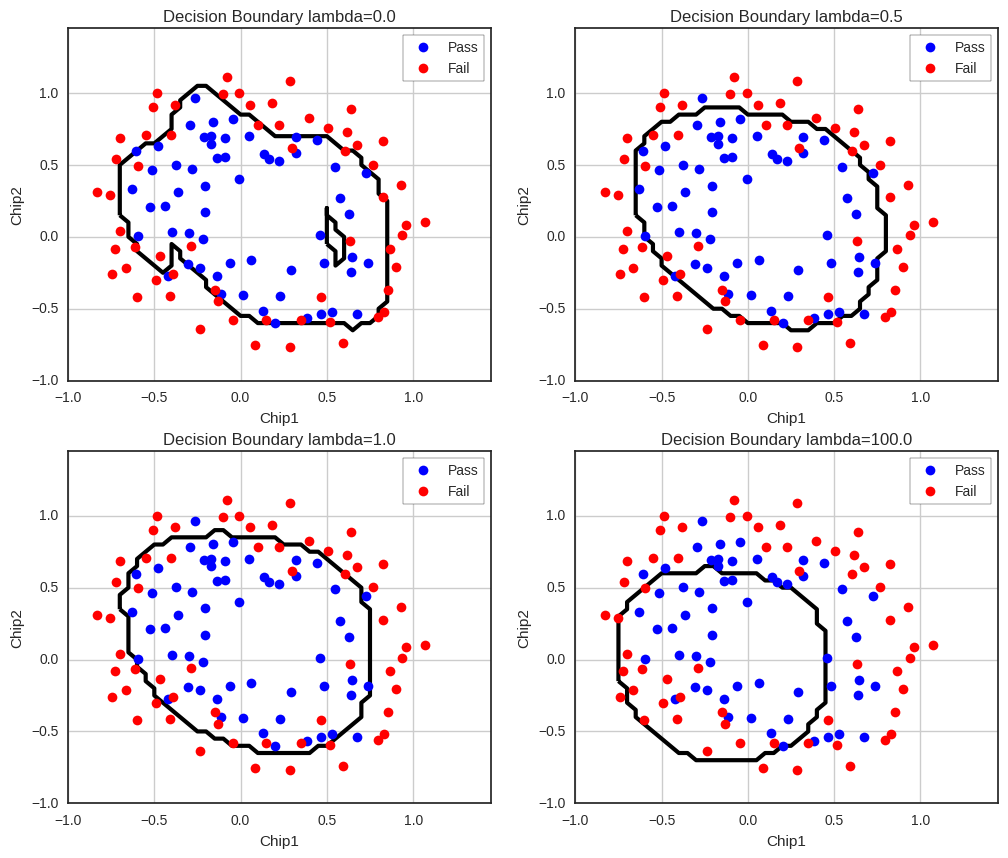

In [22]:
plt.figure(figsize=(12,10))
plt.subplot(221)
make_dataplot()
lamb = 0.
plot_decision_boundary(myfeatX,myy,lamb)
plt.title('Decision Boundary lambda={}'.format(lamb))

plt.subplot(222)
make_dataplot()
lamb = 0.5
plot_decision_boundary(myfeatX,myy,lamb)
plt.title('Decision Boundary lambda={}'.format(lamb))


plt.subplot(223)
make_dataplot()
lamb = 1.
plot_decision_boundary(myfeatX,myy,lamb)
plt.title('Decision Boundary lambda={}'.format(lamb))



plt.subplot(224)
make_dataplot()
lamb = 100.
plot_decision_boundary(myfeatX,myy,lamb)
plt.title('Decision Boundary lambda={}'.format(lamb))


plt.show()

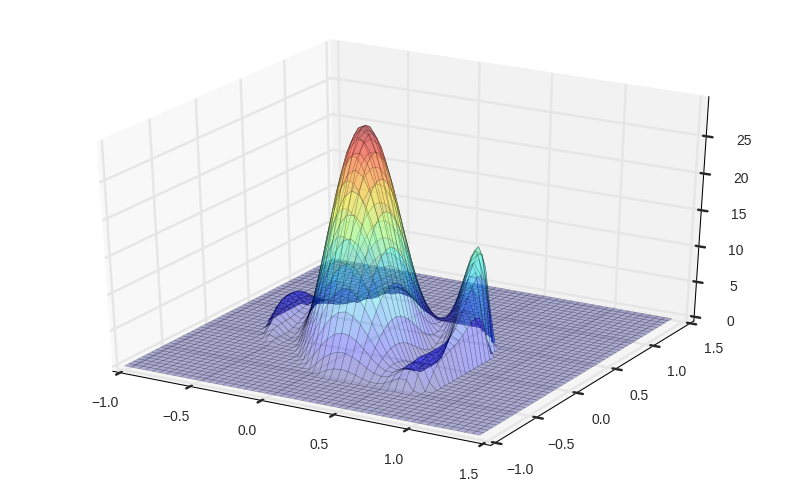

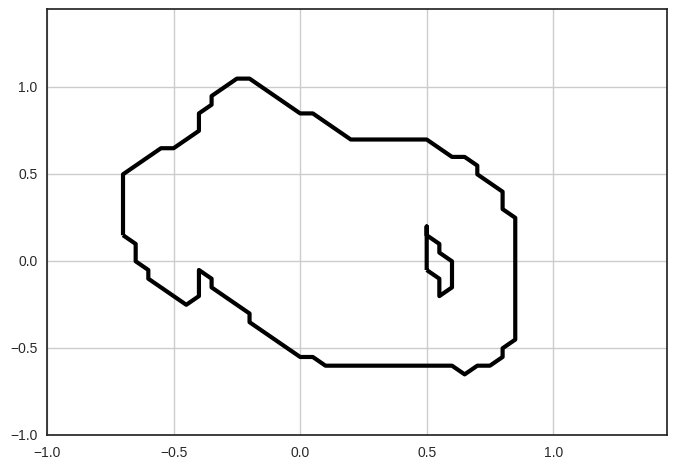

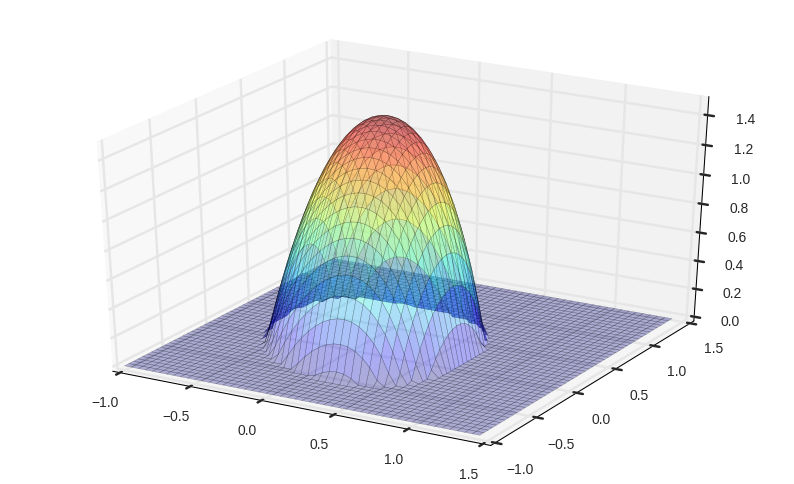

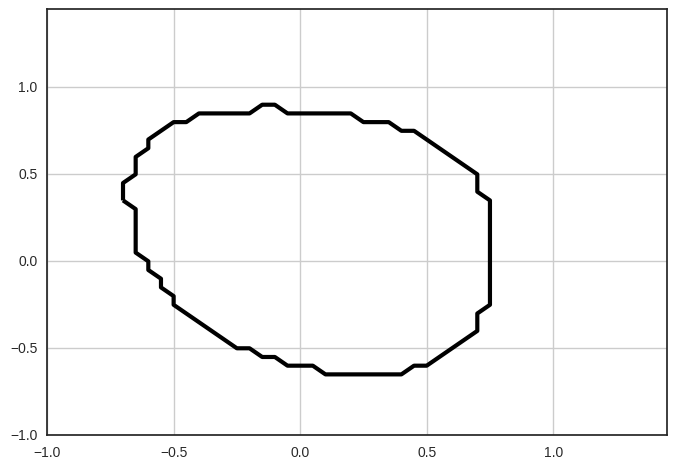

In [23]:
#look at the function for some of these.....

#No regularization
lamb=0
plot_decision_boundary(myfeatX,myy,lamb,ab='both')

#regularization =1
lamb=1
plot_decision_boundary(myfeatX,myy,lamb,ab='both')
